<a href="https://colab.research.google.com/github/Ridhi655/Linear-regression-model/blob/main/Salary_Discrimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_fwf("salary data.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.shape

(52, 6)

In [5]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [7]:
#df=df.drop_duplicates()
#df.shape

To check relationship between features and salary target

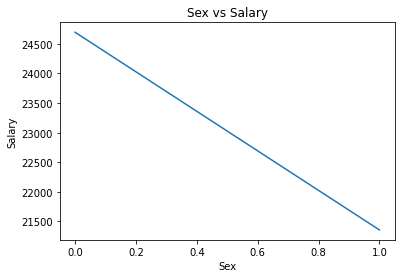

In [8]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

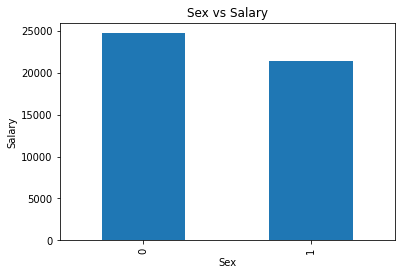

In [9]:
df.groupby('Sex')['Salary'].mean().plot(kind='bar')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

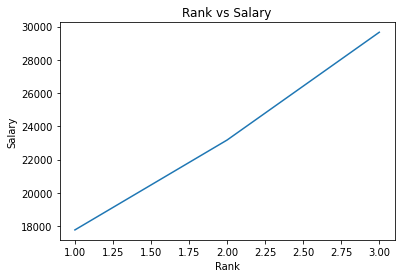

In [10]:
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

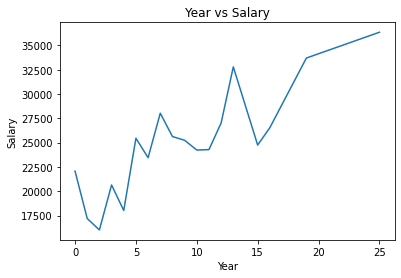

In [11]:
df.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

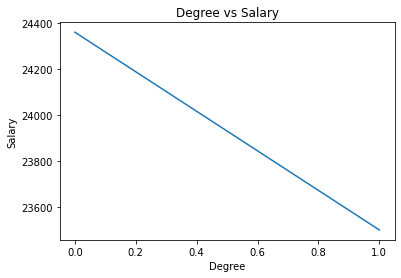

In [12]:
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

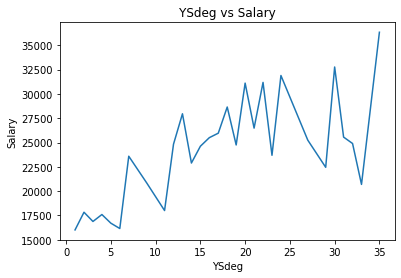

In [13]:
df.groupby('YSdeg')['Salary'].mean().plot()
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [14]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


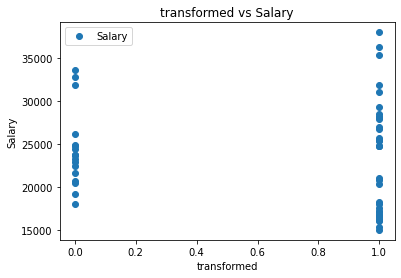

In [15]:
df['transformed']=np.sqrt(df['Degree'])
df.plot(x='transformed',y='Salary',style='o')
plt.title('transformed vs Salary')
plt.xlabel('transformed')
plt.ylabel('Salary')
plt.show()

In [16]:
df[['transformed','Salary']].corr()

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [17]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
X = df[feature]
y = df.Salary

In [18]:
#def plot_correlation():
 # for i in feature:
  #df.groupby(i)['Salary'].mean().plot()
  #plt.title(i,' vs Salary')
  #plt.xlabel(i)
  #plt.ylabel('Salary')
  #plt.show()

In [19]:
for i in X:
  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=round(percentile75+1.5*iqr)
  lower_limit=round(percentile25-1.5*iqr)
  print(f"{i} \n upper limit is {upper_limit} \n lower limit is {lower_limit}")

Sex 
 upper limit is 2 
 lower limit is -2
Rank 
 upper limit is 6 
 lower limit is -2
Year 
 upper limit is 23 
 lower limit is -9
Degree 
 upper limit is 2 
 lower limit is -2
YSdeg 
 upper limit is 48 
 lower limit is -18


In [20]:
linreg = linear_model.LinearRegression()
linreg.fit(X, y)        

LinearRegression()

In [21]:
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))
#[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [22]:
X

,Sex,Rank,Year,Degree,YSdeg
0,0,3,25,1,35
1,0,3,13,1,22
2,0,3,10,1,23
3,1,3,7,1,27
4,0,3,19,0,30
5,0,3,16,1,21
6,1,3,0,0,32
7,0,3,16,1,18
8,0,3,13,0,30
9,0,3,13,0,31


In [23]:
print(linreg.intercept_)

11410.14654725559


In [24]:
print(linreg.coef_)

[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]


In [25]:
from sklearn import metrics
print('R2-score:',linreg.score(X,y))

R2-score: 0.8547180674410969


#ANOTHER WAY -BY SPLITTING THE DATA

In [26]:
X=df[["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"]].values
y=df['Salary'].values

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled= scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [29]:
scaler.var_

array([2.07019631e-01, 7.50743605e-01, 3.03902439e+01, 2.16537775e-01,
       1.09584771e+02, 3.81758105e+07])

In [30]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train_scaled, y_train)        

LinearRegression()

In [31]:
coeff_df=pd.DataFrame(linreg.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"],columns=['Coefficients'])
y_pred=linreg.predict(X_test_scaled)
coeff_df

,Coefficients
Sex,1.736930e-12
Rank,-4.547474e-13
Year,2.273737e-13
Degree,1.705303e-12
YSdeg,3.410605e-13
Salary,6.178658e+03


In [32]:
linreg.intercept_

23655.90243902439

In [33]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,26182,26182.0
1,17095,17095.0
2,24750,24750.0
3,22450,22450.0
4,28200,28200.0
5,21600,21600.0
6,18075,18075.0
7,23713,23713.0
8,24800,24800.0
9,33696,33696.0


Feature Selection

RFE

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"],selector.support_))

[('Sex', False),
 ('Rank', True),
 ('Year', False),
 ('Degree', True),
 ('YSdeg', False),
 ('Salary', True)]